# **Exercícios**

## 1\. Iris

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

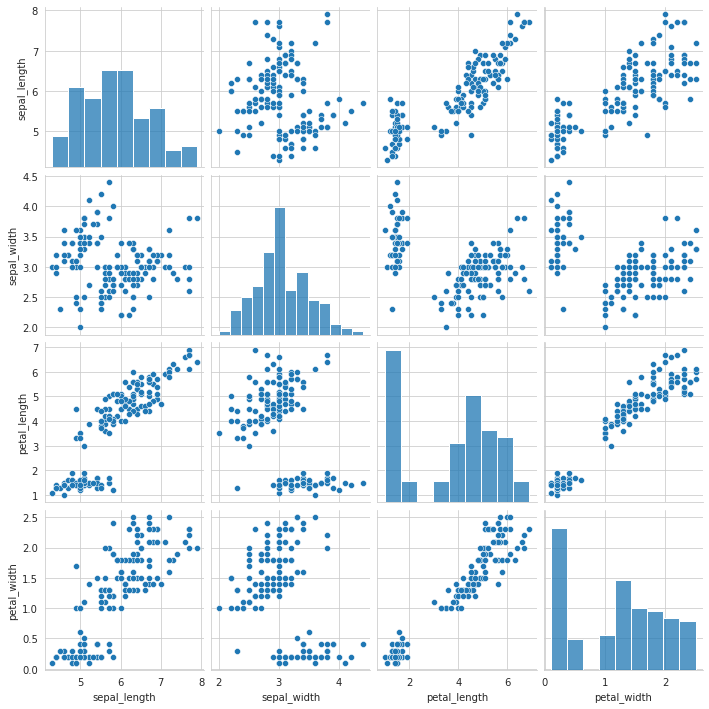

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Por análise visual dos gráficos de dispersão é possível inferir pelo meno dois grupos.

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model = model.fit(iris)
    wcss.append(model.inertia_)

In [ ]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clustered_data = pd.concat([iris, clusters], axis=1)
clustered_data.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,8
2,4.7,3.2,1.3,0.2,8
3,4.6,3.1,1.5,0.2,8
4,5.0,3.6,1.4,0.2,1


### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

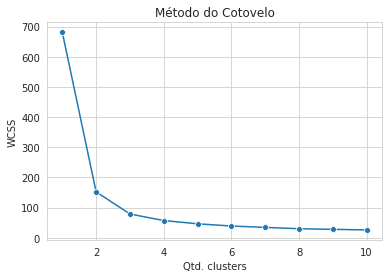

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(x=range(1, 11),
                           y=wcss,
                           marker="8",
                           palette="pastel")
    grafico.set(title='Método do Cotovelo',
                ylabel='WCSS',
                xlabel='Qtd. clusters')



*   2 clusters



In [ ]:
model = KMeans(n_clusters=2)
model = model.fit(iris)

In [ ]:
clusters = model.labels_
clustered_data = pd.concat([iris,
                            pd.DataFrame(clusters, columns=['cluster'])],
                            axis=1)

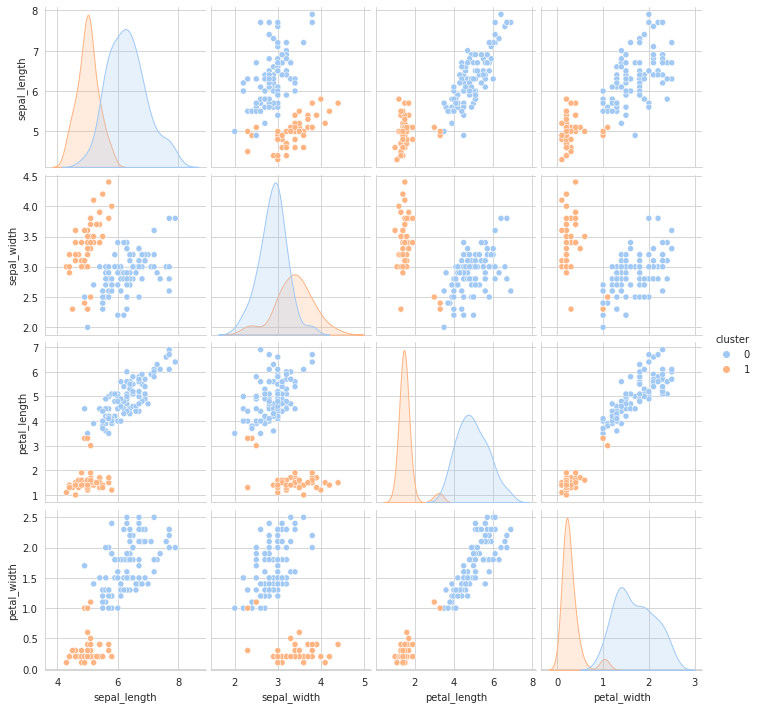

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data,
                           hue='cluster',
                           palette="pastel")



*   3 clusters



In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(iris)

In [ ]:
clusters = model.labels_
clustered_data = pd.concat([iris,
                            pd.DataFrame(clusters, columns=['cluster'])],
                            axis=1)

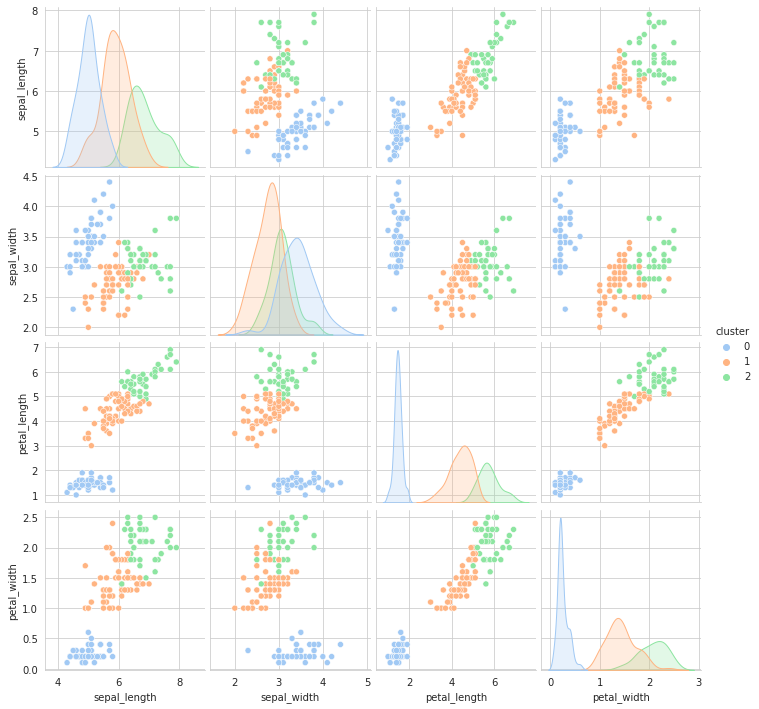

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data,
                           hue='cluster',
                           palette="pastel")



*   4 clusters



In [ ]:
model = KMeans(n_clusters=4)
model = model.fit(iris)

In [ ]:
clusters = model.labels_
clustered_data = pd.concat([iris,
                            pd.DataFrame(clusters, columns=['cluster'])],
                            axis=1)

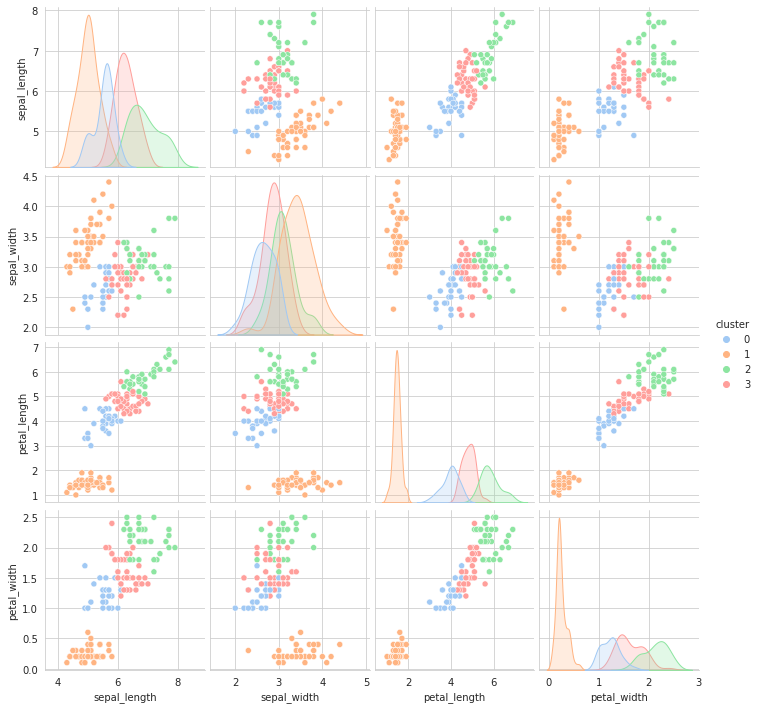

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data,
                           hue='cluster',
                           palette="pastel")

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(iris)

In [ ]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])

In [ ]:
clustered_data = pd.concat([iris, clusters], axis=1)
clustered_data.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

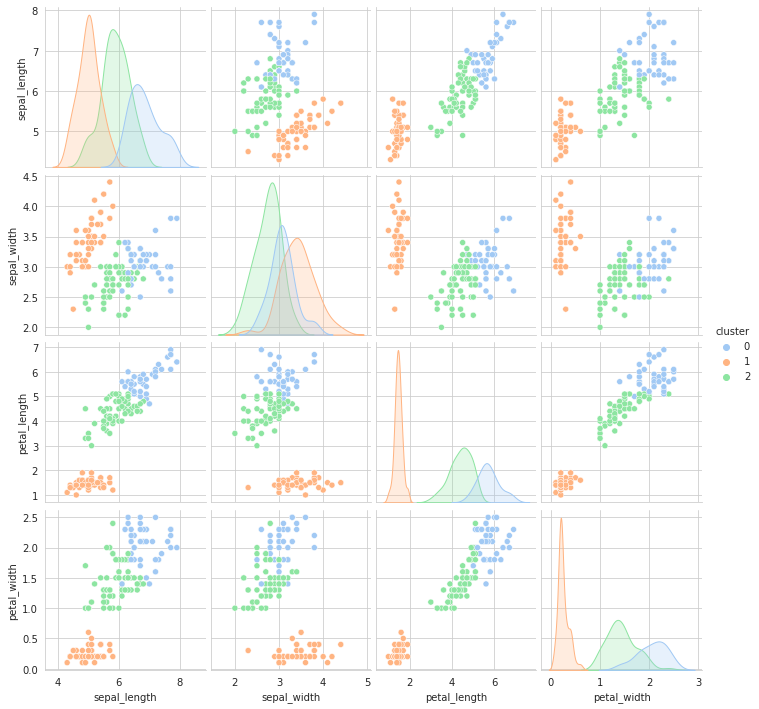

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data,
                           hue='cluster',
                           palette="pastel")

**Comentário:** A escolha de 3 clusters parece satisfatória, pois consegue separar tanto a distribuição com características mais distintas (cluster 1) quanto as distribuições que são mais semelhantes (cluster 0 e 2).

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [ ]:
flor = np.array([5.1,3.5,1.4,0.2])

In [ ]:
cluster = model.predict(flor.reshape(1, -1))
print(cluster)

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---